## Project: Analysis on factors influencing Life Expectancy

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1- Introduction

The data used is about: The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.


Here is the link of the data downloaded from kaggle:
https://www.kaggle.com/kumarajarshi/life-expectancy-who

In [2]:
df = pd.read_csv('Life_Expectancy_Data.csv')
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# 2- Data Cleaning

In [4]:
df_clean = df.copy()

### - check for duplication

In [5]:
sum(df_clean.duplicated())

0

### - check for null values

In [6]:
df_clean.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### - Remove null values

In [7]:
dropCol = ['Life_expectancy '] #these are the columns which we will drop its null rows
medianCol = ['Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP', 'Population',
             ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling'] 
#these are the columns which we will fill its null values with their mean

In [8]:
df_clean.dropna(subset = dropCol, inplace = True)

In [9]:
for i in medianCol:
    m = df_clean[i].median()
    df_clean[i] = df_clean[i].fillna(m)

In [10]:
df_clean.isna().sum() #to check that all null values are filled 
# here we notice that when we remove the life expectancy null values the adult morality null values are also removed

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [11]:
df_clean.head(20)

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [13]:
normalized_df = df_clean[df_clean.columns[3::]]
normalized_df=(normalized_df-normalized_df.mean())/normalized_df.std()
normalized_df.head()
#here we normalized all the data to be in the same range for better visualization

,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,-0.443615,0.790103,0.267474,-1.160344,-0.336045,-0.786580,-0.110905,-0.966460,0.254017,-3.280413,0.940393,-0.735488,-0.323999,-0.453811,0.433794,2.810814,2.770957,-0.735631,-0.588756
1,-0.979112,0.854468,0.284407,-1.160344,-0.334918,-0.917345,-0.168541,-0.991640,0.272685,-1.053969,0.948776,-0.862364,-0.323999,-0.451676,-0.183612,2.879003,2.815525,-0.750234,-0.619484
2,-0.979112,0.830331,0.301340,-1.160344,-0.335070,-0.830169,-0.173939,-1.016819,0.291354,-0.882704,0.927820,-0.777780,-0.323999,-0.450245,0.396744,2.924462,2.860093,-0.779439,-0.650211
3,-1.021112,0.862513,0.326739,-1.160344,-0.332577,-0.699404,0.031268,-1.041999,0.316245,-0.668623,1.091276,-0.650904,-0.323999,-0.447376,-0.121345,2.969921,2.926945,-0.813513,-0.680939
4,-1.052611,0.886650,0.343671,-1.160344,-0.368282,-0.655816,0.050944,-1.062143,0.341136,-0.625807,0.818849,-0.608612,-0.323999,-0.492915,-0.134620,3.038110,2.971513,-0.857321,-0.773121


In [14]:
df_final = pd.concat([df_clean[df_clean.columns[:3:]], normalized_df], axis=1)
df_final #this is our final cleaned and normalized data

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,-0.443615,0.790103,0.267474,-1.160344,-0.336045,-0.786580,-0.110905,...,-3.280413,0.940393,-0.735488,-0.323999,-0.453811,0.433794,2.810814,2.770957,-0.735631,-0.588756
1,Afghanistan,2014,Developing,-0.979112,0.854468,0.284407,-1.160344,-0.334918,-0.917345,-0.168541,...,-1.053969,0.948776,-0.862364,-0.323999,-0.451676,-0.183612,2.879003,2.815525,-0.750234,-0.619484
2,Afghanistan,2013,Developing,-0.979112,0.830331,0.301340,-1.160344,-0.335070,-0.830169,-0.173939,...,-0.882704,0.927820,-0.777780,-0.323999,-0.450245,0.396744,2.924462,2.860093,-0.779439,-0.650211
3,Afghanistan,2012,Developing,-1.021112,0.862513,0.326739,-1.160344,-0.332577,-0.699404,0.031268,...,-0.668623,1.091276,-0.650904,-0.323999,-0.447376,-0.121345,2.969921,2.926945,-0.813513,-0.680939
4,Afghanistan,2011,Developing,-1.052611,0.886650,0.343671,-1.160344,-0.368282,-0.655816,0.050944,...,-0.625807,0.818849,-0.608612,-0.323999,-0.492915,-0.134620,3.038110,2.971513,-0.857321,-0.773121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,-2.617102,4.491063,-0.028849,-0.050801,-0.371847,-0.655816,-0.208677,...,-0.668623,0.508702,-0.735488,6.263302,-0.463566,0.046466,1.037907,1.010525,-1.086098,-0.865304
2934,Zimbabwe,2003,Developing,-2.596102,4.426698,-0.037315,-0.127321,-0.371847,-3.314690,-0.124487,...,-3.237597,0.253040,-0.608612,6.872873,-0.463642,0.043812,1.128825,1.121945,-1.032555,-0.773121
2935,Zimbabwe,2002,Developing,-2.564602,-0.738554,-0.045781,-0.032946,-0.371847,-0.437876,-0.184909,...,-0.411726,0.257231,-0.481736,7.482444,-0.493380,-0.187346,-0.825919,-0.794475,-0.988746,-0.619484
2936,Zimbabwe,2001,Developing,-2.512103,4.193377,-0.045781,-0.724179,-0.371847,-0.307111,-0.165320,...,-0.283277,0.102157,-0.312568,7.934707,-0.456490,0.038864,-0.735001,-0.705339,-0.988746,-0.680939


# 3- Exploratory Data Analysis

#### Questions:
1- Country with highest and lowest life expectancy and in which year

2- The highest country (Belgium) in life expectancy over the years

3- The lowest country (Haiti) in life expectancy over the years

4- The immunizarion coverage in all the countries

5- Life expectancy histogram for all countries

6- Average life expectancy in every country

7- Highest average life expectancy (Japan)

8- Lowest average life expectancy (sierra leone)

9- Life Expectancy compared with drinking alcohol

10- Development and developing countries according to life expectancy

##### 1- Country with highest and lowest life expectancy and in which year

In [15]:
high = df_clean['Life_expectancy '].idxmax() 
high_data = pd.DataFrame(df_clean.loc[high]) #to get the highest country in life expectancy

low = df_clean['Life_expectancy '].idxmin()
low_data = pd.DataFrame(df_clean.loc[low]) #to get the lowest country in life expectancy

In [16]:
q1 = pd.concat([high_data, low_data], axis=1)
q1

,241,1127
Country,Belgium,Haiti
Year,2014,2010
Status,Developed,Developing
Life_expectancy,89.0,36.3
Adult_Mortality,76.0,682.0
infant_deaths,0,23
Alcohol,12.6,5.76
percentage expenditure,7163.348923,36.292918
Hepatitis B,98.0,92.0
Measles,70,0


In [17]:
high_LE_Country = df_clean.loc[high].Country
high_LE_Country

'Belgium'

In [18]:
low_LE_Country = df_clean.loc[low].Country
low_LE_Country

'Haiti'

#### 2- The highest country (Belgium) in life expectancy over the years

In [19]:
pd.set_option('display.max_columns', None) #to display all the dataframe

df_Belgium = df_final.loc[df_final['Country'] == high_LE_Country] #here we filtered the dataframe to belgium coutry only
#this used the normalized final dataframe for better visualization in the plot
df_Belgium.sort_index(inplace=True ,ascending=False) 

#here we will output the unnormalized dataframe for better observation
df_Belgium2 = df_clean.loc[df_clean['Country'] == high_LE_Country] 
df_Belgium2.sort_index(inplace=True ,ascending=False) 
df_Belgium2


C:\Users\Me.Amin\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6402: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key,


,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
255,Belgium,2000,Developed,77.6,11.0,1,11.21,287.208453,6.0,0,58.1,1,96.0,8.12,95.0,0.1,2327.45910,125125.0,0.8,0.8,0.869,18.0
254,Belgium,2001,Developed,78.0,1.0,1,11.01,2943.375396,6.0,83,58.5,1,96.0,8.29,95.0,0.1,23121.56635,128657.0,0.8,0.8,0.873,18.2
253,Belgium,2002,Developed,78.0,99.0,1,11.29,320.317766,6.0,0,59.0,1,96.0,8.46,95.0,0.1,2552.33280,1332785.0,0.8,0.8,0.875,18.8
252,Belgium,2003,Developed,78.3,95.0,0,11.28,507.306164,64.0,44,59.4,1,96.0,9.30,95.0,0.1,3743.95693,1376133.0,0.8,0.8,0.878,18.6
251,Belgium,2004,Developed,78.8,91.0,1,12.05,5160.508378,64.0,61,59.8,1,96.0,9.32,95.0,0.1,35589.71295,1421137.0,0.8,0.8,0.880,18.8
250,Belgium,2005,Developed,78.9,89.0,0,12.27,5068.214488,77.0,26,6.2,1,97.0,9.24,97.0,0.1,36967.28292,1478617.0,0.8,0.8,0.861,15.7
249,Belgium,2006,Developed,79.4,85.0,0,10.98,5579.199083,94.0,15,6.6,1,99.0,9.17,98.0,0.1,38852.36130,1547958.0,0.8,0.8,0.865,15.7
248,Belgium,2007,Developed,79.5,86.0,0,10.25,640.356092,94.0,64,6.9,1,99.0,9.25,98.0,0.1,4443.83131,16257.0,0.8,0.8,0.871,15.8
247,Belgium,2008,Developed,79.5,87.0,0,10.47,7191.051507,98.0,98,61.3,1,99.0,9.60,99.0,0.1,48424.58927,179973.0,0.8,0.8,0.874,15.8
246,Belgium,2009,Developed,79.8,85.0,0,10.05,671.937657,97.0,33,61.6,1,98.0,1.39,98.0,0.1,4488.56150,1796493.0,0.9,0.9,0.876,15.8


we observed that there is a variation in total expenditure and population so will plot them in correspond to life expectancy

C:\Users\Me.Amin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


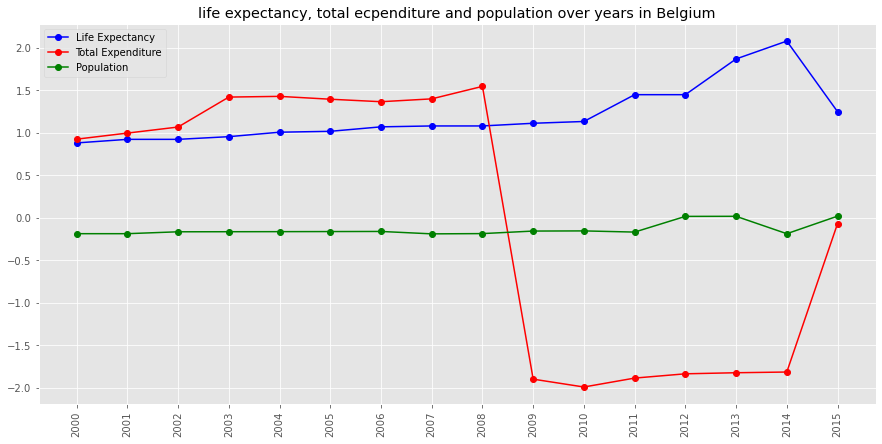

In [20]:
# make a copy of df_clean dataframe
df_t = df_Belgium.copy() # target dataframe
df_t.index = df_t['Year'] # the year column will be the index
df_t.drop(columns='Year',  inplace=True)
df_t.sort_index(inplace=True)

#create a new dataframe with the 3 target columns
data_to_plot = df_t.groupby([(df_t.index)])['Life_expectancy ', 'Total expenditure', 'Population'].mean()
idx = data_to_plot.index 
le = data_to_plot['Life_expectancy ']
te = data_to_plot['Total expenditure']
p = data_to_plot['Population']


plt.style.use('ggplot')
plt.figure(figsize=(15,7))
plt.plot(idx, le, '-bo', label='Life Expectancy')
plt.plot(idx, te, '-ro', label='Total Expenditure')
plt.plot(idx, p, '-go', label='Population')

plt.title('life expectancy, total ecpenditure and population over years in Belgium')
plt.legend()
plt.xticks(idx,rotation=90)

plt.show()

we conclude from the plot that there is no direct relation between total expenditure and life expectancy but there is an inverse relation between population and life expectancy that there is a slight increase in the life expectancy when the population increase.

#### 3-  The lowest country (Haiti) in life expectancy over the years

In [21]:
df_Haiti = df_final.loc[df_final['Country'] == low_LE_Country] #here we filtered the dataframe to haiti coutry only
df_Haiti.sort_index(inplace=True ,ascending=False)

#here we will do the same but with the unnormalized data for better observation to the dataframe 
df_Haiti2 = df_clean.loc[df_clean['Country'] == low_LE_Country]
df_Haiti2.sort_index(inplace=True ,ascending=False)
df_Haiti2

C:\Users\Me.Amin\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6402: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  key,


,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1137,Haiti,2000,Developing,58.6,35.0,20,4.79,74.460330,92.0,992,34.0,28,5.0,6.60,41.0,5.1,462.486524,85492.0,4.8,4.8,0.439,7.8
1136,Haiti,2001,Developing,58.9,35.0,19,6.22,60.778159,92.0,159,34.8,27,52.0,5.63,45.0,5.0,413.738316,8692567.0,4.7,4.7,0.443,7.9
1135,Haiti,2002,Developing,59.3,33.0,19,6.10,50.285582,92.0,0,35.6,26,54.0,5.47,48.0,4.8,393.163270,8834733.0,4.6,4.7,0.444,8.0
1134,Haiti,2003,Developing,59.7,3.0,18,6.64,44.256871,92.0,0,36.5,25,56.0,5.32,53.0,4.6,329.782946,8976552.0,4.5,4.6,0.447,8.1
1133,Haiti,2004,Developing,58.7,32.0,18,6.10,64.398533,92.0,0,37.5,24,58.0,5.61,55.0,4.3,387.942972,9119178.0,4.5,4.5,0.450,8.1
1132,Haiti,2005,Developing,65.0,29.0,17,5.57,38.109043,92.0,0,38.5,24,6.0,4.41,6.0,3.9,465.311876,926344.0,4.4,4.4,0.452,8.2
1131,Haiti,2006,Developing,61.1,28.0,17,6.18,6.995556,92.0,0,39.6,23,61.0,5.70,6.0,3.3,55.476260,949457.0,4.3,4.3,0.455,8.3
1130,Haiti,2007,Developing,61.8,266.0,17,6.08,56.778587,92.0,0,4.7,23,62.0,5.56,63.0,2.7,615.819819,9556889.0,4.2,4.2,0.458,8.4
1129,Haiti,2008,Developing,62.1,259.0,16,5.95,63.831957,92.0,0,41.8,22,64.0,5.92,63.0,2.4,674.756415,97529.0,4.2,4.2,0.462,8.4
1128,Haiti,2009,Developing,62.5,251.0,16,5.85,41.300795,92.0,0,43.0,21,65.0,6.68,65.0,2.0,668.297646,985287.0,4.1,4.1,0.466,8.5


we will visualize the same columns as the previous question to support our conclusion

C:\Users\Me.Amin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


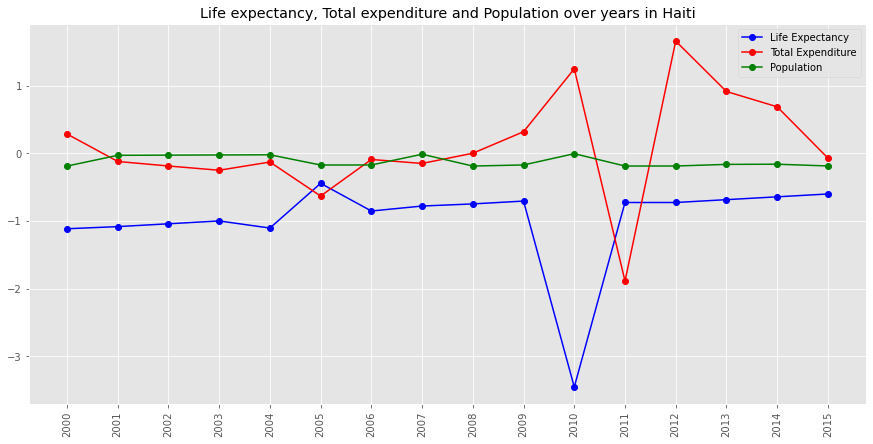

In [22]:
# make a copy of df_clean dataframe
df_t = df_Haiti.copy()
df_t.index = df_t['Year']
df_t.drop(columns='Year',  inplace=True)
df_t.sort_index(inplace=True)
#create a new dataframe with the 3 target columns
data_to_plot = df_t.groupby([(df_t.index)])['Life_expectancy ', 'Total expenditure', 'Population'].mean()
idx = data_to_plot.index 
le = data_to_plot['Life_expectancy ']
te = data_to_plot['Total expenditure']
p = data_to_plot['Population']


plt.style.use('ggplot')
plt.figure(figsize=(15,7))
plt.plot(idx, le, '-bo', label='Life Expectancy ')
plt.plot(idx, te, '-ro', label='Total Expenditure')
plt.plot(idx, p, '-go', label='Population')

plt.title('Life expectancy, Total expenditure and Population over years in Haiti')
plt.legend()
plt.xticks(idx,rotation=90)

plt.show()

As the previous plot, we conclude the same that there is no relation between life expectancy and total expenditure but there is an inverse relation between population and life expectancy

#### 4- The immunization coverage in all the countries

Immunization coverage as Hepatitis B, Polio and Diphtheria

In [23]:
immunization = df_clean[['Country','Year','Life_expectancy ', 'Hepatitis B', 'Polio', 'Diphtheria ']]
immunization


,Country,Year,Life_expectancy,Hepatitis B,Polio,Diphtheria
0,Afghanistan,2015,65.0,65.0,6.0,65.0
1,Afghanistan,2014,59.9,62.0,58.0,62.0
2,Afghanistan,2013,59.9,64.0,62.0,64.0
3,Afghanistan,2012,59.5,67.0,67.0,67.0
4,Afghanistan,2011,59.2,68.0,68.0,68.0
...,...,...,...,...,...,...
2933,Zimbabwe,2004,44.3,68.0,67.0,65.0
2934,Zimbabwe,2003,44.5,7.0,7.0,68.0
2935,Zimbabwe,2002,44.8,73.0,73.0,71.0
2936,Zimbabwe,2001,45.3,76.0,76.0,75.0


C:\Users\Me.Amin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


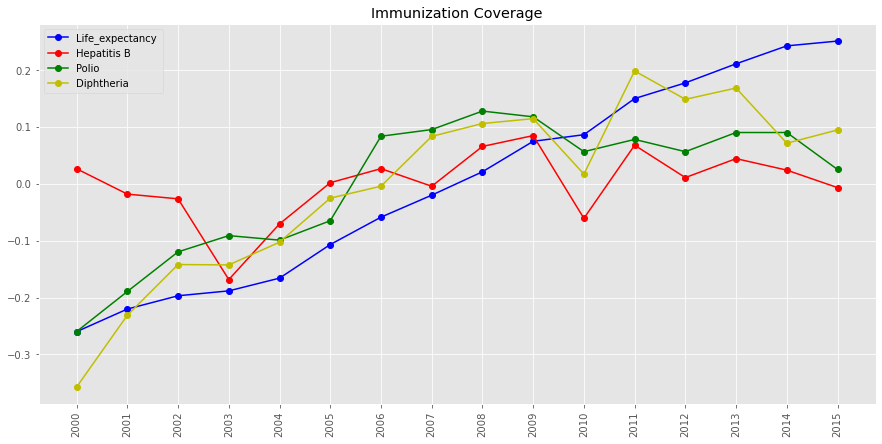

In [24]:
immunization2 = df_final[['Country','Year','Life_expectancy ', 'Hepatitis B', 'Polio', 'Diphtheria ']]
# make a copy of df_clean dataframe
df_t = immunization2.copy()
df_t.index = df_t['Year']
df_t.drop(columns='Year',  inplace=True)
df_t.sort_index(inplace=True)

#create a new dataframe with the 4 target columns
data_to_plot = df_t.groupby([(df_t.index)])['Life_expectancy ', 'Hepatitis B', 'Polio', 'Diphtheria '].mean()
idx = data_to_plot.index 
le = data_to_plot['Life_expectancy ']
hp = data_to_plot['Hepatitis B']
pol = data_to_plot['Polio']
di = data_to_plot['Diphtheria ']


plt.style.use('ggplot')
plt.figure(figsize=(15,7))
plt.plot(idx, le, '-bo', label='Life_expectancy ')
plt.plot(idx, hp, '-ro', label='Hepatitis B')
plt.plot(idx, pol, '-go', label='Polio')
plt.plot(idx, di, '-yo', label='Diphtheria')

plt.title('Immunization Coverage')
plt.legend()
plt.xticks(idx,rotation=90)

plt.show()

It doesn't seem that there is a relation but further analysis can find a relation between them

#### 5- Life expectancy histogram for all countries

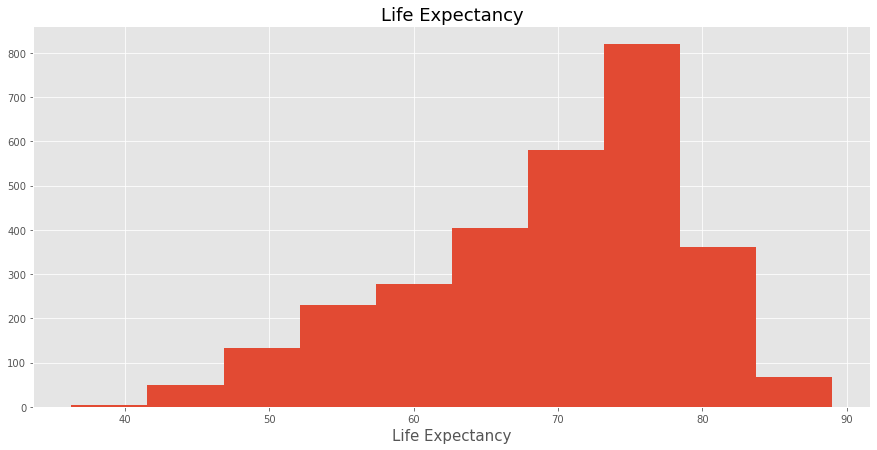

In [25]:
plt.style.use('ggplot') # gray background grid
plt.figure(figsize=(15,7))
plt.hist(df_clean['Life_expectancy '])
plt.xlabel('Life Expectancy', fontsize = 15) 
plt.title('Life Expectancy', fontsize=18)
plt.show()

The distribution of the above graph is left skewed! Most of the life expectancies arrange from 70 to 80.

#### 6- Average life expectancy in every country

In [26]:
x = df_clean['Country'].unique() # a list of all country names
#here we loop in every country and find its average life expectancy
li= []
for i in x:
    li.append(df_clean.loc[df_clean['Country'] == i]['Life_expectancy '].mean())
              
              
Average_LE = pd.DataFrame(li, x, columns= ['Average_LE'])
Average_LE

,Average_LE
Afghanistan,58.19375
Albania,75.15625
Algeria,73.61875
Angola,49.01875
Antigua and Barbuda,75.05625
...,...
Venezuela (Bolivarian Republic of),73.38750
Viet Nam,74.77500
Yemen,63.86250
Zambia,53.90625


#### 7- Highest average life expectancy (Japan)

In [27]:
#to get the country that have the highest average Life expectancy over the years
h = li.index(max(li))

highest_coutry = x[h]
highest_coutry

'Japan'

In [28]:
df_clean.loc[df_final['Country'] == 'Japan']

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1314,Japan,2015,Developed,83.7,55.0,2,3.77,0.000000,92.0,35,29.0,3,99.0,5.75,96.0,0.1,34474.13736,127141.0,2.1,1.8,0.902,15.3
1315,Japan,2014,Developed,83.5,57.0,2,0.01,88.833622,92.0,462,28.6,3,99.0,1.23,96.0,0.1,3896.21151,127276.0,2.0,1.7,0.899,15.3
1316,Japan,2013,Developed,83.5,56.0,2,7.55,94.434286,92.0,229,28.2,3,99.0,1.25,96.0,0.1,4454.44746,127445.0,2.0,1.7,0.894,15.3
1317,Japan,2012,Developed,83.3,58.0,2,7.39,121.586916,92.0,228,27.8,3,99.0,1.17,97.0,0.1,4863.47665,127629.0,1.9,1.7,0.889,15.3
1318,Japan,2011,Developed,82.5,64.0,3,7.39,9498.729062,92.0,434,27.4,4,96.0,1.70,97.0,0.1,48167.99727,127833.0,1.9,1.6,0.884,15.1
1319,Japan,2010,Developed,83.0,62.0,3,6.90,863.006149,92.0,450,26.9,4,98.0,9.58,97.0,0.1,4457.67639,1287.0,1.9,1.6,0.879,15.1
1320,Japan,2009,Developed,83.0,64.0,3,7.09,899.178528,92.0,741,26.4,4,99.0,9.51,97.0,0.1,4855.17564,12847.0,1.8,1.6,0.881,15.0
1321,Japan,2008,Developed,82.7,66.0,3,7.11,7313.175418,92.0,11015,25.9,4,98.0,8.60,98.0,0.1,39339.29757,12863.0,1.8,1.5,0.880,15.0
1322,Japan,2007,Developed,82.6,67.0,3,7.29,6599.995239,92.0,0,25.4,4,97.0,8.25,98.0,0.1,35275.22843,1281.0,1.8,1.5,0.877,15.0
1323,Japan,2006,Developed,82.4,68.0,3,7.49,6502.136974,92.0,520,24.9,4,95.0,8.19,98.0,0.1,35433.98896,127854.0,1.7,1.5,0.873,14.9


#### 8- Lowest average life expectancy (sierra leone)

In [29]:
#to get the country that have the lowest average Life expectancy over the years
l= li.index(min(li))

lowest_country = x[l]
lowest_country

'Sierra Leone'

In [30]:
df_clean.loc[df_final['Country'] == lowest_country]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2297,Sierra Leone,2015,Developing,51.0,413.0,22,3.77,0.000000,86.0,607,24.4,30,86.0,5.75,86.0,0.5,587.538233,723725.0,7.4,7.3,0.431,9.5
2298,Sierra Leone,2014,Developing,48.1,463.0,23,0.01,1.443286,83.0,1006,23.8,32,83.0,11.90,83.0,0.6,78.439476,779162.0,7.5,7.4,0.426,9.5
2299,Sierra Leone,2013,Developing,54.0,47.0,23,0.01,1.321464,92.0,15,23.3,33,92.0,11.59,92.0,0.8,71.818700,692279.0,7.7,7.6,0.413,9.3
2300,Sierra Leone,2012,Developing,49.7,411.0,25,0.01,54.560337,91.0,678,22.7,35,91.0,11.24,91.0,0.9,561.898424,676613.0,7.9,7.8,0.401,9.1
2301,Sierra Leone,2011,Developing,48.9,418.0,26,3.78,54.665917,89.0,1865,22.2,38,88.0,11.98,89.0,1.3,445.525000,6611692.0,8.1,8.0,0.392,8.9
2302,Sierra Leone,2010,Developing,48.1,424.0,27,3.84,5.347718,86.0,1089,21.7,40,84.0,1.32,86.0,1.6,45.128418,645872.0,8.3,8.2,0.384,8.7
2303,Sierra Leone,2009,Developing,47.1,433.0,28,3.97,49.837127,84.0,31,21.2,42,81.0,13.13,84.0,1.7,394.593244,63126.0,8.5,8.4,0.375,8.5
2304,Sierra Leone,2008,Developing,46.2,441.0,29,3.91,5.379606,77.0,44,2.7,44,75.0,1.29,77.0,1.9,46.375918,6165372.0,8.7,8.7,0.367,8.3
2305,Sierra Leone,2007,Developing,45.3,45.0,29,3.86,45.571089,63.0,0,2.2,45,63.0,1.12,64.0,2.2,358.827472,615417.0,8.9,8.9,0.357,8.2
2306,Sierra Leone,2006,Developing,44.3,464.0,30,3.80,38.000758,92.0,33,19.7,46,65.0,1.68,64.0,2.2,322.313468,5848692.0,9.1,9.1,0.348,8.0


By this comparison, hepatitis B there is almost no change is the 2 countries thus it has no relation with life expectancy


besides, total expendature has also no relation that it increases in sierra leone


all the other factor can be affecting life expectancy

#### 9- Life Expectancy compared with drinking alcohol

In [31]:
alcohol = df_clean[['Year','Life_expectancy ', 'Alcohol']]
alcohol

,Year,Life_expectancy,Alcohol
0,2015,65.0,0.01
1,2014,59.9,0.01
2,2013,59.9,0.01
3,2012,59.5,0.01
4,2011,59.2,0.01
...,...,...,...
2933,2004,44.3,4.36
2934,2003,44.5,4.06
2935,2002,44.8,4.43
2936,2001,45.3,1.72


C:\Users\Me.Amin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


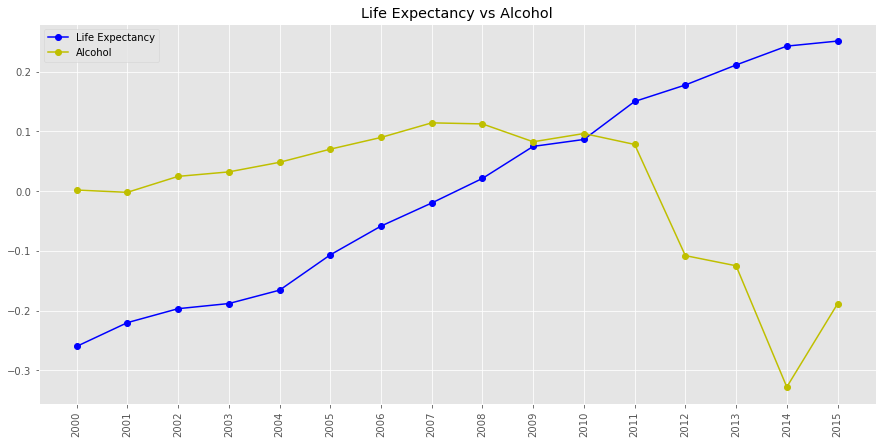

In [32]:
alcohol2 = df_final[['Year','Life_expectancy ', 'Alcohol']]
# make a copy of df_clean dataframe
df_t = alcohol2.copy() # target dataframe
df_t.index = df_t['Year'] # years 
df_t.drop(columns='Year',  inplace=True)
df_t.sort_index(inplace=True)

#create a new dataframe with the 3 target columns
data_to_plot = df_t.groupby([(df_t.index)])['Life_expectancy ', 'Alcohol'].mean()
idx = data_to_plot.index 
le = data_to_plot['Life_expectancy ']

al = data_to_plot['Alcohol']


plt.style.use('ggplot')
plt.figure(figsize=(15,7))
plt.plot(idx, le, '-bo', label='Life Expectancy')

plt.plot(idx, al, '-yo', label='Alcohol')

plt.title('Life Expectancy vs Alcohol')
plt.legend()
plt.xticks(idx,rotation=90)

plt.show()

This shows a strong negative relation between alcohol and life expectancy that life expectancy increases when drinking alcohol decreases and vice versa

#### 10- Development and developing countries according to life expectancy

In [33]:
developed = df_clean.loc[df_clean['Status'] == 'Developed']['Life_expectancy '].mean()
developing = df_clean.loc[df_clean['Status'] == 'Developing']['Life_expectancy '].mean()

print(developed)
print(developing)


79.19785156249996
67.11146523178817


This shows that developed countries has an average life expectancy higher than developing countries

In [34]:
df_developed = df_clean.loc[df_clean['Status'] == 'Developed'][['Year','Life_expectancy ']]

df_developing = df_clean.loc[df_clean['Status'] == 'Developing'][['Year','Life_expectancy ']]
df_developed

,Year,Life_expectancy
112,2015,82.8
113,2014,82.7
114,2013,82.5
115,2012,82.3
116,2011,82.0
...,...,...
2805,2004,77.5
2806,2003,77.2
2807,2002,77.0
2808,2001,76.9


In [35]:
df_developing

,Year,Life_expectancy
0,2015,65.0
1,2014,59.9
2,2013,59.9
3,2012,59.5
4,2011,59.2
...,...,...
2933,2004,44.3
2934,2003,44.5
2935,2002,44.8
2936,2001,45.3


# 4- Conclusion

As mentioned after every step:
- There is no direct relation between total expenditure and life expectancy 
- There is an inverse relation between population and life expectancy
- Most of the life expectancies arrange from 70 to 80
- Hepatitis B has no relation with life expectancy
- There is a strong negative relation between alcohol and life expectancy
- Developed countries has an average life expectancy higher than developing countries


# 5- Observations and limitations of the dataset

- Some years in Haiti has 0 measles and that is not logical to a developing country besides the other years record high numbers
- It is noticed that in 2015 all countries has 0 total expenditure (it has to be handled at the beginning by considering it a null value) 
##### note: we didn't consider the 0 values as null because it can be a reasonable value in many cases

# Feature engineering